In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_excel(r'G:\ds-projects\predict fare of airline tickets using machinelearning/Data_Train.xlsx')
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [4]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data[train_data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
train_data.dropna(inplace = True)

In [8]:
data = train_data.copy()

In [9]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [10]:
#lets convert datetime columns
def converttodatetime(column):
    data[column] = pd.to_datetime(data[column])

In [11]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
datetimecolumns = ['Date_of_Journey','Dep_Time','Arrival_Time']
for i in datetimecolumns:
    converttodatetime(i)

In [13]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [15]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [16]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [17]:
data['journey_day'] = data['Date_of_Journey'].dt.day

In [18]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [19]:
data['journey_dayofweek'] = data['Date_of_Journey'].dt.dayofweek

In [20]:
data.drop('Date_of_Journey',axis = 1,inplace = True)

In [21]:
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_min'] = df[col].dt.minute
    df.drop(col,axis = 1,inplace = True)
    return df.head(2)

In [22]:
extract_hour_min(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,journey_dayofweek,Dep_Time_hour,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,3,24,2019,6,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-01-24 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,5,5,50


In [23]:
extract_hour_min(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,6,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,50,13,15


In [24]:
def fligth_dep_time(x):
    if (x>4)  and (x<= 8):
        return 'early mrng'
    elif (x>8) and (x<=12):
        return 'morning'
    elif (x>12) and (x<= 16):
        return 'Noon'
    elif (x>16) and (x<= 20):
        return 'Evening'
    elif (x>20) and (x<= 24):
        return 'Night'
    else:
        return 'Late night'

<AxesSubplot:>

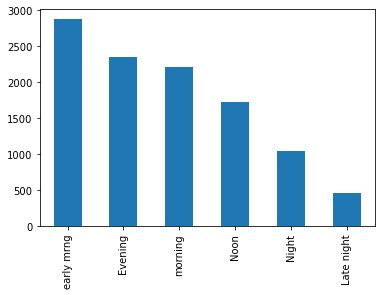

In [25]:
data['Dep_Time_hour'].apply(fligth_dep_time).value_counts().plot(kind = 'bar')

In [26]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [27]:
cf.go_offline()

In [28]:
data['Dep_Time_hour'].apply(fligth_dep_time).value_counts().iplot(kind = 'bar')

In [29]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h '+x
    elif 'm' not in x:
        x = x + ' 0m'
    return x

In [30]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [31]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
#converting duration to minutes can create outliers, so lets create 2 features one for hours and one for minutes
data['Duration_hours'] =  data['Duration'].apply(lambda x: int(x.split()[0][0:-1]))

In [33]:
data['Duration_mins'] =  data['Duration'].apply(lambda x: int(x.split()[1][0:-1]))

In [34]:
#lets analyze whether duration impacts onn price or not?
#which city has maximum final destination of flights?
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [35]:
data.head(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_month,journey_day,journey_year,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,2019,6,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,3,18,5,23,30,5,25,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,3,16,50,21,35,4,45,285


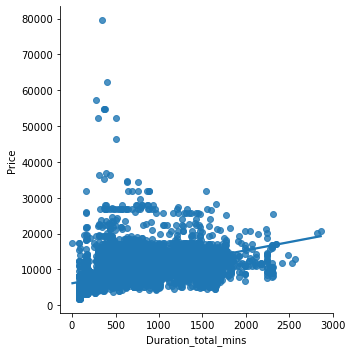

In [36]:
sns.lmplot(x = 'Duration_total_mins',y = 'Price',data = data)

<AxesSubplot:>

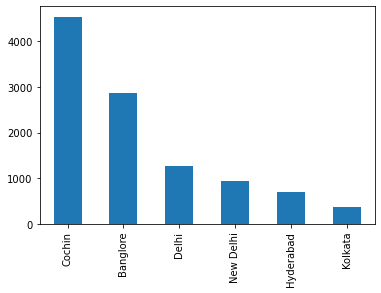

In [37]:
data['Destination'].value_counts().plot(kind = 'bar')

In [38]:
#on which route jet_airways is extremely used
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending = False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

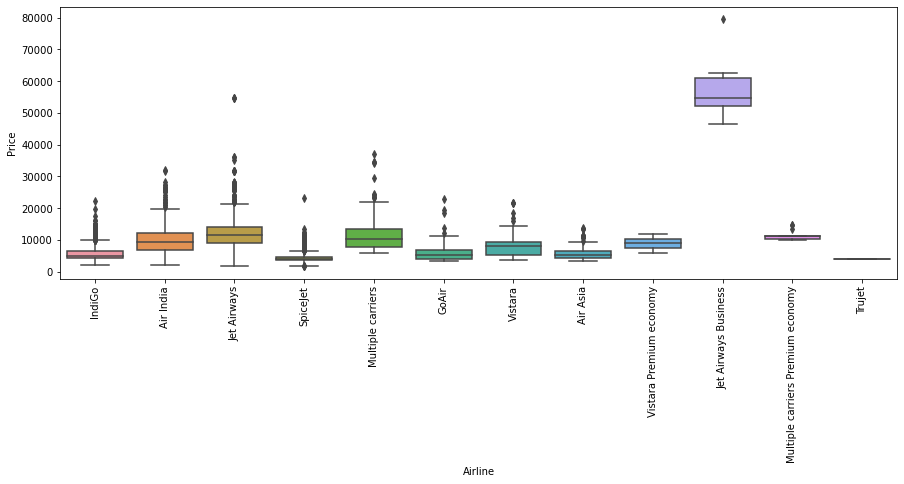

In [39]:
plt.figure(figsize = (15,5))
sns.boxplot(x = 'Airline',y = 'Price',data = data)
plt.xticks(rotation = 'vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

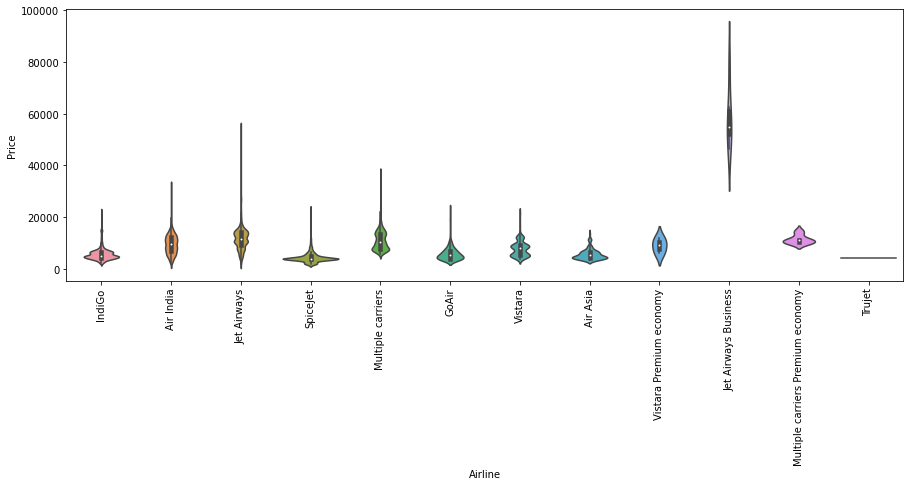

In [40]:
#violinplot = boxplot + Distributionplot
plt.figure(figsize = (15,5))
sns.violinplot(x = 'Airline',y = 'Price',data = data)
plt.xticks(rotation = 'vertical')

In [41]:
#one hot encoding of data
#drop columns
data.drop(['Additional_Info','Duration_mins','Route','journey_year'],axis = 1, inplace = True)

In [42]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_total_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,6,22,20,1,10,2,170
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,5,50,13,15,7,445


In [43]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_month', 'journey_day', 'journey_dayofweek', 'Dep_Time_hour',
       'Dep_Time_min', 'Arrival_Time_hour', 'Arrival_Time_min',
       'Duration_hours', 'Duration_total_mins'],
      dtype='object')

In [44]:
cat_col = [col for col in data.columns  if data[col].dtype == 'object']

In [45]:
num_col = [col for col in data.columns  if data[col].dtype != 'object']

In [46]:
# one_hot encoding
for category in data['Source'].unique():
    data['Source_'+category] = data['Source'].apply(lambda x : 1 if x == category else 0)

In [47]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,3,24,6,22,20,1,10,2,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,5,50,13,15,7,445,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,9,6,4,9,25,4,25,19,1140,0,0,1,0,0


> ### target guided feature encoding

In [48]:
#target guided feature encoding
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [49]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [50]:
dict1 = {key:index for index,key in enumerate(airlines)}

In [51]:
data['Airline'] = data['Airline'].map(dict1)

In [52]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [53]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [54]:
data['Destination'].replace('New Delhi','Delhi',inplace = True)

In [55]:
Dest = data.groupby(['Destination'])['Price'].mean().sort_values().index
Dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [56]:
dict2 = {key:index for index,key in enumerate(Dest)}
data['Destination'] = data['Destination'].map(dict2)
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_month,journey_day,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,3,24,6,22,20,1,10,2,170,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,1,5,5,5,50,13,15,7,445,0,1,0,0,0


In [57]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [58]:
stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [59]:
data['Total_Stops'] = data['Total_Stops'].map(stops)

> ## Outlier_detection

In [60]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax = ax1)
    sns.boxplot(df[col],ax = ax2)
    sns.distplot(df[col],ax = ax3,kde = False)

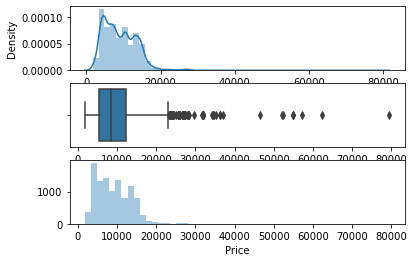

In [61]:
plot(data,'Price')

In [62]:
data['Price'] =  np.where(data['Price']>= 35000,data['Price'].median(),data['Price'])

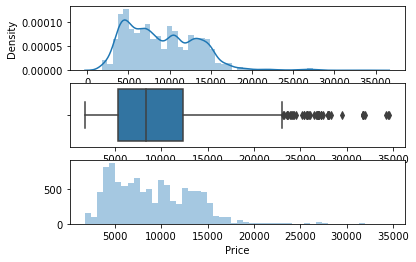

In [63]:
#after outlier manipulation
plot(data,'Price')

In [64]:
data.drop(['Source','Duration'],axis = 1, inplace = True)

In [65]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_month,journey_day,journey_dayofweek,Dep_Time_hour,Dep_Time_min,Arrival_Time_hour,Arrival_Time_min,Duration_hours,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,3,24,6,22,20,1,10,2,170,1,0,0,0,0
1,7,3,2,7662.0,1,5,5,5,50,13,15,7,445,0,1,0,0,0


In [66]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_month            int64
journey_day              int64
journey_dayofweek        int64
Dep_Time_hour            int64
Dep_Time_min             int64
Arrival_Time_hour        int64
Arrival_Time_min         int64
Duration_hours           int64
Duration_total_mins      int64
Source_Banglore          int64
Source_Kolkata           int64
Source_Delhi             int64
Source_Chennai           int64
Source_Mumbai            int64
dtype: object

> # Feature Selection

In [67]:
from sklearn.feature_selection import mutual_info_regression

In [68]:
X = data.drop('Price',axis = 1)

In [69]:
Y = data['Price']

In [70]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_month          int64
journey_day            int64
journey_dayofweek      int64
Dep_Time_hour          int64
Dep_Time_min           int64
Arrival_Time_hour      int64
Arrival_Time_min       int64
Duration_hours         int64
Duration_total_mins    int64
Source_Banglore        int64
Source_Kolkata         int64
Source_Delhi           int64
Source_Chennai         int64
Source_Mumbai          int64
dtype: object

In [71]:
mutual_info_regression(X,Y)

array([0.97042474, 0.99821553, 0.78777586, 0.24702431, 0.1973185 ,
       0.23998467, 0.33756004, 0.2600526 , 0.39485016, 0.35493751,
       0.47163482, 0.49206082, 0.39490812, 0.45138716, 0.51354808,
       0.13708931, 0.19750825])

In [72]:
imp = pd.DataFrame(mutual_info_regression(X,Y),index = X.columns)
imp.columns = ['importance']

In [73]:
imp.sort_values(by = 'importance',ascending = False)

,importance
Destination,1.016835
Airline,0.973908
Total_Stops,0.788055
Source_Delhi,0.522716
Duration_total_mins,0.504314
Duration_hours,0.466508
Source_Kolkata,0.462345
Arrival_Time_hour,0.396754
Source_Banglore,0.389484
Arrival_Time_min,0.350529


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

> ### lets creat a machine_learning model

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
model = RandomForestRegressor()
rand_model = model.fit(x_train,y_train)

In [78]:
y_preds = rand_model.predict(x_test)
y_preds

array([16751.8 ,  6078.16,  8831.27, ...,  3752.25,  6927.74,  7280.76])

In [79]:
from sklearn.metrics import f1_score,r2_score
r2_score(y_test,y_preds)

0.8138520220859068

# Saving the model

In [80]:
'''import pickle
file = open('randomforest_model_airlinetickets.pkl', 'wb')'''

"import pickle\nfile = open('randomforest_model_airlinetickets.pkl', 'wb')"

In [81]:
    '''pickle.dump(rand_model,file)'''

'pickle.dump(rand_model,file)'

In [82]:
'''mmodell = open('randomforest_model_airlinetickets.pkl','rb')'''

"mmodell = open('randomforest_model_airlinetickets.pkl','rb')"

In [83]:
'''kk = pickle.load(mmodell)
kk.predict(x_test)'''

'kk = pickle.load(mmodell)\nkk.predict(x_test)'

## Automate ml pipeline

In [90]:
def automatemlpipeline(ml_model):
    model = ml_model.fit(x_train,y_train)
    print('Training_score:{}'.format(model.score(x_train,y_train)))
    y_prediction = model.predict(x_test)
    print('predictions for x_test are',y_prediction)
    print()
    
    from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,\
    r2_score,mean_squared_error
    print('r2_score is ',r2_score(y_test,y_prediction))
    print('mae is ',mean_absolute_error(y_test,y_prediction))
    print('mape is ',mean_absolute_percentage_error(y_test,y_prediction))
    print('mse is ',mean_squared_error(y_test,y_prediction))
    print('rmse is ',np.sqrt(r2_score(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

Training_score:0.9512451487352985
predictions for x_test are [16586.16  5909.    8797.39 ...  3586.63  7023.99  7400.49]

r2_score is  0.8120281612337348
mae is  1181.383130367968
mape is  0.13271162204552653
mse is  3659360.5054764342
rmse is  0.9011260518005985


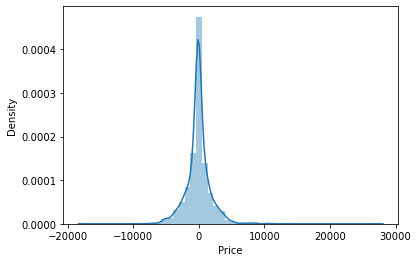

In [91]:
automatemlpipeline(RandomForestRegressor())

In [93]:
from xgboost import XGBRegressor

Training_score:0.9338106669878684
predictions for x_test are [16228.836   6376.9893  8366.037  ...  3776.1777  7242.2163  7406.093 ]

r2_score is  0.8328560446659874
mae is  1180.8063354263677
mape is  0.13516355609228325
mse is  3253891.6089390935
rmse is  0.9126094699629121


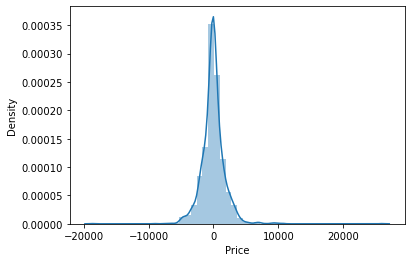

In [94]:
automatemlpipeline(XGBRegressor())

## Optimizing the model using Randomsearchcv

In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
random_grid = {
    'n_estimators':[int(x) for x in np.linspace(start = 1000,stop = 1200 ,num = 6)],
    'max_features':['auto','sqrt'],
    'max_depth':[int(x) for x in np.linspace(start = 5,stop = 30,num = 4)],
    'min_samples_split':[5,10,15,50,100]
}

In [98]:
rf_random = RandomizedSearchCV(RandomForestRegressor(),param_distributions=random_grid,cv= 3,\
                   n_jobs = -1,verbose = 2)

In [99]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 50,
                                                              100],
                                        'n_estimators': [1000, 1040, 1080, 1120,
                                                         1160, 1200]},
                   verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [102]:
pred2 = rf_random.predict(x_test)
r2_score(y_test,pred2)

0.8186104908130292